In [2]:
include("OneTest.jl")
using Plots, Plots.PlotMeasures
using HTTP
using DataFrames
using CSV

In [3]:
invopt_results = HTTP.get("https://raw.githubusercontent.com/maxkapur/StudentPrefsRevOpt/main/results.csv").body |> CSV.File |> DataFrame

,name,demand,cutoff,yield,trueyield,preferability
,String,Int64,Float64,Float64,Float64,Float64
1,University of Arkansas at Pine Bluff,568,0.0,0.5,0.000754329,4.46923e-6
2,Delaware State University,1036,0.0,0.28,0.00137585,8.15163e-6
3,Wesley College,556,0.0,0.3,0.000738393,4.37481e-6
4,Edward Waters College,208,0.0,0.4,0.000276233,1.63662e-6
5,St Thomas University,210,0.0,0.63,0.000278889,1.65236e-6
6,Paine College,268,0.0,0.22,0.000355916,2.10872e-6
7,Savannah State University,1301,0.0,0.54,0.00172779,1.02367e-5
8,University of Hawaii-West Oahu,301,0.0,0.43,0.000399741,2.36838e-6
9,Calumet College of Saint Joseph,192,0.0,0.88,0.000254984,1.51073e-6


# Results plot

In [4]:
function plot_cutoff_gamma(stats::DataFrame)

    pl = plot(size=(600, 600), xlim=(0, 1), ylim=(0, 0.05),#1.1*maximum(stats[!, :preferability])),
              xlabel="cutoff percentile (p)", ylabel="preferability (γ)", legend=:topleft,
              title="Admissions standards, class size and school preferability", titlefontsize=12)

    scatter!(pl,
             stats[!, :cutoff],
             stats[!, :preferability],
             marker=:circle,
             ms=stats[!, :trueyield]*400,
             msw=0,
             ma=.75,
             color=:olivedrab,
             label="Marker size: True yield")

    numsfont = text("").font
    numsfont.rotation = 0
    numsfont.halign = :hcenter
    numsfont.valign = :vcenter
    numsfont.pointsize = 7

    best = sortperm(stats[!, :preferability], rev=true)

    n = 20

    for i in 1:n
        annotate!(pl,
              [(stats[best[i], :cutoff], 
                stats[best[i], :preferability],
                text(i, numsfont))])
    end

    font = text("").font
    font.rotation = 0
    font.halign = :left
    font.valign = :top
    font.pointsize = 9

    key = join([string(i)*". "*stats[best[i], :name] for i in 1:n], '\n')
    # annotate!(pl, [(0.07, 0.043, text(key, font))])
    print(key)

    return pl
end

# pl = plot_cutoff_gamma(invopt_results)

# # savefig(pl, "paper/plots/US-cutoff-gamma.pdf")
# # savefig(pl, "paper/plots/US-cutoff-gamma.png")

# pl

plot_cutoff_gamma (generic function with 1 method)

In [5]:
# Just a helper fn to make the table in the text
function parser(x)
    if typeof(x)<:Vector{<:AbstractFloat}
        return round.(x, digits=4)
    elseif typeof(x)<:Vector{String}
        return replace.(x, Pair("University", "U"))
    else
        return x
    end
end

best = sortperm(invopt_results[!, :preferability], rev=true)

mapcols(parser, invopt_results[best[1:20], :])

,name,demand,cutoff,yield,trueyield,preferability
,String,Int64,Float64,Float64,Float64,Float64
1,Harvard U,1659,0.9526,0.81,0.0465,0.0465
2,Yale U,1356,0.9527,0.66,0.0381,0.0381
3,U of Chicago,1426,0.949,0.53,0.0371,0.0367
4,U of Pennsylvania,2421,0.9207,0.63,0.0405,0.0358
5,Northwestern U,2037,0.9268,0.41,0.0369,0.0337
6,Cornell U,3223,0.8984,0.52,0.0421,0.0326
7,Washington U in St Louis,1610,0.9364,0.34,0.0336,0.032
8,Massachusetts Institute of Technology,1115,0.9515,0.72,0.0305,0.0304
9,Princeton U,1285,0.9445,0.65,0.0308,0.03


## Demand curves

In [6]:
america = Market(log.(invopt_results[!, :preferability]), ones(size(invopt_results)[1]), invopt_results[!, :preferability])

Market{Float64}([-12.318293680220687, -11.71729267612241, -12.339646804691256, -13.32287701924052, -13.31330756822437, -13.069428118430983, -11.489526620429334, -12.953304834192963, -13.402919726914057, -10.77395782796415  …  -3.5240050910471457, -3.6208443341473204, -3.442792848341855, -5.3399957750876315, -3.5063210288644875, -3.304284581424574, -3.4927363343536104, -3.0692473664596838, -3.268317643975551, -4.819617066445362], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [4.469233322714244e-6, 8.151629792837952e-6, 4.37481290040338e-6, 1.6366206533883148e-6, 1.6523573904401256e-6, 2.1087227649426365e-6, 1.0236747452202872e-5, 2.368378926297513e-6, 1.5107267569738292e-6, 2.093772864743416e-5  …  0.02948112381711662, 0.026760072508319587, 0.03197525846057723, 0.004795890972472707, 0.030007106895331252, 0.03672547652824177, 0.030417525670831353, 0.04645610612665606, 0.038070421232116076, 0.008069876774098001])

In [7]:
# Make sure the demand function is working like it should. These should agree with the demand col of the df.
sum(invopt_results[!, :demand]) * demand(america, invopt_results[!, :cutoff])

677-element Vector{Float64}:
  568.0000000000072
 1036.0000000000173
  556.0000000000078
  208.0000000000032
  210.00000000000256
  268.00000000000375
 1301.0000000000182
  301.0000000000044
  192.00000000000315
 2661.000000000042
   64.00000000000088
  506.0000000000072
  201.0000000000029
    ⋮
  396.9999999999998
 1676.9999999999993
 1613.0000000000002
 1414.9999999999993
 1609.999999999999
  216.99999999999983
 1285.0
 1425.999999999999
 1114.9999999999993
 1658.9999999999998
 1356.0
  248.99999999999994

Warning: The calculations below are very slow! 

In [9]:
idxs_to_plot = [677, best[106:107]...]

function calc_demand_curves(ran, idxs_to_plot)
    fixed_cuts = copy(invopt_results[!, :cutoff])
    cuts_to_plot= vcat(ran, invopt_results[idxs_to_plot, :cutoff]) |> sort
    
    total_demand = sum(invopt_results[!, :demand])
    
    res = zeros(length(cuts_to_plot), length(idxs_to_plot))
    
    for (c, i) in enumerate(idxs_to_plot)
        p = copy(fixed_cuts)
        for (d, t) in enumerate(cuts_to_plot)
            p[i] = t
            res[d, c] = demand(america, p)[i] * total_demand
        end
    end
    
    return cuts_to_plot, res
end


function plot_demand_curves(cuts, curves)
    pl = plot(xlabel="cutoff (p)", ylabel="demand (number of students)",
              size=(700, 500), yticks=([0, 5000, 10000, 15000, 20000], [0, 5000, 10000, 15000, 20000]))
    
    colors = [:crimson, :dodgerblue, :olivedrab, :rebeccapurple]
    
    for (c, i) in enumerate(idxs_to_plot)
        plot!(pl,
              cuts, 
              curves[:, c],
              label=invopt_results[i, :name],
              color = colors[c])
        
        vline!(pl,
               [invopt_results[i, :cutoff]],
               color = colors[c], ls=:dash, label=nothing)
    end
    
    plot!(pl, [0.75], [1], ms=nothing,
           color = :black, ls=:dash, label="Current cutoffs", legend=true)
    
    return pl
end

plot_demand_curves (generic function with 1 method)

In [10]:
# allthree = calc_demand_curves(0.5:0.01:1, idxs_to_plot)
caltech = calc_demand_curves(0.94:0.0005:0.96, [677])
# allthree_plot = plot_demand_curves(allthree...)

([0.94, 0.9405, 0.941, 0.9415, 0.942, 0.9425, 0.943, 0.9435, 0.944, 0.9445  …  0.956, 0.9565, 0.957, 0.9575, 0.958, 0.9585, 0.959, 0.9590225465522962, 0.9595, 0.96], [378.2566831588278; 374.5220137669818; … ; 246.09874825115799; 243.06049209990945])

Some more facts about Caltech:

No. applicants: 5535
No. admitted: 584
No. enrolled: 249

In our hypothetical scenario, Caltech wants to achieve enrollment of 300. Suppose fits its demand curve based on its observed yield. This means becoming $300/249$ths as lenient. 

In [23]:
1- 350(1 - invopt_results[677, :cutoff])/249

0.9506295741593931

Equivalently, fit a linear curve to the observation of the demand, which is $(p, D) = (.996, 249)$ and (implicitly) $(1, 0)$. Then we have 

In [30]:
b, m = [1 invopt_results[677, :cutoff];
 1 1]\[249, 0]

(350 - b) / m

0.9424011698526252

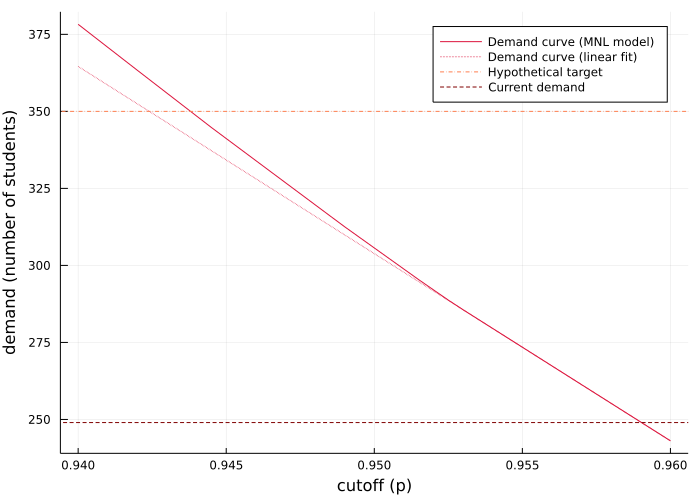

In [32]:
function plot_caltech(cuts, curves)
    pl = plot(xlabel="cutoff (p)", ylabel="demand (number of students)",
              size=(700, 500))
    
    colors = [:crimson, :dodgerblue, :olivedrab, :rebeccapurple]
    
    c = 1
    i = 677
    
    plot!(pl,
          cuts, 
          curves[:, c],
          label="Demand curve (MNL model)",#invopt_results[i, :name],
          color = colors[c])


    plot!(pl, [cuts[1], cuts[end]], b .+ m * [cuts[1], cuts[end]],
      ls=:dot, color = :crimson, label="Demand curve (linear fit)")



    hline!(pl,
        [350],
           ls=:dashdot, c=:coral, label="Hypothetical target")

    hline!(pl,
           [invopt_results[i, :demand]],
           color = :maroon, ls=:dash, label="Current demand")
    
    return pl
end

caltech_plot = plot_caltech(caltech...)

In [52]:
# Target cutoff predicted by my model
b2, m2 = [[1, 1] caltech[1][8:9]] \ caltech[2][8:9]
(350 - b2) / m2

0.9437941480008459

0.9437941480008459

In [31]:
# savefig(allthree_plot, "paper/plots/three-demand-curves.pdf")
# savefig(allthree_plot, "paper/plots/three-demand-curves.png")

# savefig(caltech_plot, "paper/plots/caltech-demand-curve.pdf")
# savefig(caltech_plot, "paper/plots/caltech-demand-curve.png")